# 多层神经网络、Sequential 和 Module

## 1.多层神经网络

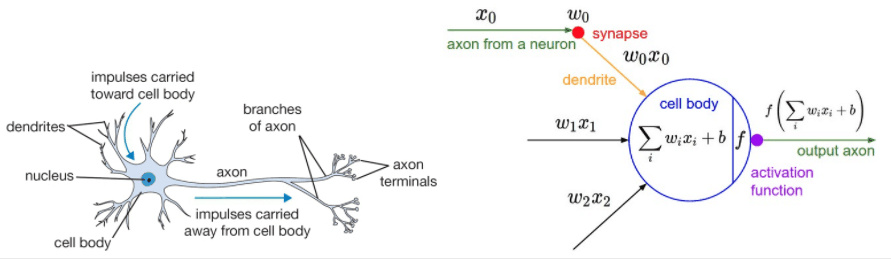

左边是一张神经元的图片，神经元通过突触接受输入，然后通过**神经激活**的方式传输给后面的神经元。这对比于右边的神经网络，首先接受数据输入，然后通过计算得到结果，接着经过**激活函数**，再传给第二层的神经元。


神经网络使用的激活函数都是非线性的，每个激活函数都输入一个值，然后做一种特定的数学运算得到一个结果，下面举几个例子

sigmoid 激活函数

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

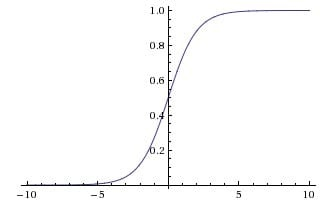

tanh 激活函数
$$tanh(x) = 2 \sigma(2x) - 1$$

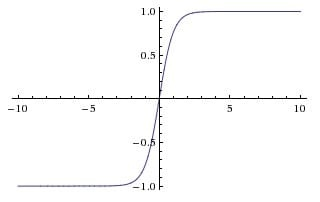

ReLU 激活函数

$$ReLU(x) = max(0, x)$$

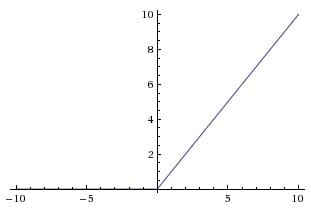

### 1.2 为什么要使用激活函数
激活函数在神经网络中非常重要，使用激活函数也是非常必要的，前面我们从人脑神经元的角度理解了激活函数，因为神经元需要通过激活才能往后传播，所以神经网络中需要激活函数，下面我们从数学的角度理解一下激活函数的必要性。

比如一个两层的神经网络，使用 A 表示激活函数，那么

$$
y = w_2 A(w_1 x)
$$

如果我们不使用激活函数，那么神经网络的结果就是

$$
y = w_2 (w_1 x) = (w_2 w_1) x = \bar{w} x
$$

可以看到，我们将两层神经网络的参数合在一起，用 $\bar{w}$ 来表示，两层的神经网络其实就变成了一层神经网络，只不过参数变成了新的 $\bar{w}$，所以如果不使用激活函数，那么不管多少层的神经网络，$y = w_n \cdots w_2 w_1 x = \bar{w} x$，就都变成了单层神经网络，所以在每一层我们都必须使用激活函数。

## 2. 神经网络的结构
下面的图展示一个两层的神经网络和三层的神经网络。

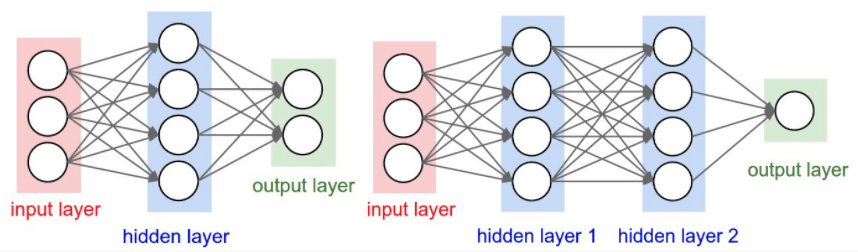

可以看到，神经网络的结构其实非常简单，主要有输入层，隐藏层，输出层构成，输入层需要根据特征数目来决定，输出层根据解决的问题来决定，那么隐藏层的网路层数以及每层的神经元数就是可以调节的参数。

神经网络向前传播也非常简单，就是一层一层不断做运算，可以看看下面这个例子

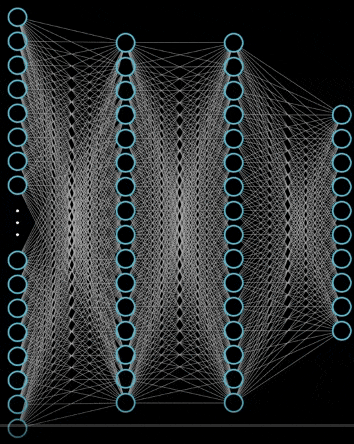

## 3. 用Sequential构建网络


对于前面的线性回归模型，我们在构建的时候定义了需要的参数。这对于比较小的模型是可行的，但是对于大的模型，比如100 层的神经网络，这个时候再去手动定义参数就显得非常麻烦，所以 PyTorch 提供了两个模块来帮助我们构建模型，一个是Sequential，一个是 Module。

Sequential 允许我们构建序列化的模块，而 Module 是一种更加灵活的模型定义方式，我们下面分别用 Sequential 和 Module 来定义神经网络。

In [1]:
from torch import nn
# Sequential
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [2]:
# 序列模块可以通过索引访问每一层
seq_net[0] # 第一层

Linear(in_features=2, out_features=4, bias=True)

In [3]:
# 打印出第一层的权重
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[-0.5979, -0.0129],
        [-0.6103,  0.6973],
        [-0.3848,  0.2228],
        [ 0.6122, -0.6297]], requires_grad=True)


In [4]:
# 通过 parameters 可以取得模型的参数
param = seq_net.parameters()

## 4. 用Module构建网络

下面我们再用 Module 定义这个模型，下面是使用 Module 的模板

```
class net_name(nn.Module):
    def __init__(self, params):
        super(net_name, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        self.layer2 = nn.Sequential(...)
        ...
        
        定义需要用的网络层
        
    def forward(self, x): # 定义前向传播
        x1 = self.layer1(x)
        x2 = self.layer2(x)
        x = x1 + x2
        ...
        return x
```

注意的是，Module 里面也可以使用 Sequential，同时 Module 非常灵活，具体体现在 forward 中，如何复杂的操作都能直观的在 forward 里面执行

下面我们照着模板实现一下上面的神经网络

In [5]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        
        self.layer2 = nn.Tanh()
        
        self.layer3 = nn.Linear(num_hidden, num_output)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [6]:
mo_net = module_net(2, 4, 1)

In [7]:
# 访问模型中的某层可以直接通过名字

# 第一层
l1 = mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [8]:
# 打印出第一层的权重
print(l1.weight)

Parameter containing:
tensor([[-0.5214,  0.2634],
        [-0.0732, -0.2397],
        [ 0.6440,  0.6019],
        [ 0.5613,  0.5438]], requires_grad=True)
